In [1]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import requests
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import StratifiedShuffleSplit
    import category_encoders as ce
    from sklearn.preprocessing import LabelEncoder
    import seaborn as sns
    from sklearn.model_selection import train_test_split

except ImportError as e:
    print(e)

# read data

In [2]:
df = pd.read_csv(r"Datasets\flight_data.csv",index_col=0)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [4]:
isinstance(df["airline"],object)

True

In [5]:
col_lst = []
for col in df.columns:
    if df[col].dtype== object:
        print(col,":",df[col].nunique())
        col_lst.append(col)
        # df.nunique()

print(df[col_lst[1]].unique())
print(df[col_lst[2]].unique())

airline : 6
flight : 1561
source_city : 6
departure_time : 6
stops : 3
arrival_time : 6
destination_city : 6
class : 2
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']


In [52]:
df_encoded = pd.get_dummies(df, columns=['departure_time'])
df_encoded

,airline,flight,source_city,stops,arrival_time,destination_city,class,duration,days_left,price,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,SG-8709,0,0,Night,1,0,2.17,1,5953,False,False,True,False,False,False
1,0,SG-8157,0,0,Morning,1,0,2.33,1,5953,False,True,False,False,False,False
2,1,I5-764,0,0,Early_Morning,1,0,2.17,1,5956,False,True,False,False,False,False
3,2,UK-995,0,0,Afternoon,1,0,2.25,1,5955,False,False,False,False,True,False
4,2,UK-963,0,0,Morning,1,0,2.33,1,5955,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,2,UK-822,5,1,Evening,4,1,10.08,49,69265,False,False,False,False,True,False
300149,2,UK-826,5,1,Night,4,1,10.42,49,77105,True,False,False,False,False,False
300150,2,UK-832,5,1,Night,4,1,13.83,49,79099,False,True,False,False,False,False
300151,2,UK-828,5,1,Evening,4,1,10.00,49,81585,False,True,False,False,False,False


In [6]:
print(df['stops'].unique())
print(df['class'].unique())
print(df['source_city'].unique())
print(df['destination_city'].unique())
print(df['airline'].unique())


['zero' 'one' 'two_or_more']
['Economy' 'Business']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


In [7]:
mapping_values = {'zero': 0,'one': 1,'two_or_more': 2,"Economy":0,"Business":1,'Delhi':0 ,'Mumbai':1, 'Bangalore':2, 'Kolkata':3, 'Hyderabad':4, 'Chennai':5,'SpiceJet':0, 'AirAsia':1, 'Vistara':2, 'GO_FIRST':3, 'Indigo':4, 'Air_India':5,'Evening':1, 'Early_Morning':2, 'Morning':0, 'Afternoon':3, 'Night':4, 'Late_Night':5}
df['stops'] = df['stops'].replace(mapping_values).astype(int)
df['class'] = df['class'].replace(mapping_values).astype(int)
df['source_city'] = df['source_city'].replace(mapping_values).astype(int)
df['destination_city'] = df['destination_city'].replace(mapping_values).astype(int)
df['airline'] = df['airline'].replace(mapping_values).astype(int)
df['departure_time'] = df['departure_time'].replace(mapping_values).astype(int)
df['arrival_time'] = df['arrival_time'].replace(mapping_values).astype(int)
df

C:\Users\HARSH\AppData\Local\Temp\ipykernel_6716\2647827966.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['stops'] = df['stops'].replace(mapping_values).astype(int)
C:\Users\HARSH\AppData\Local\Temp\ipykernel_6716\2647827966.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace(mapping_values).astype(int)
C:\Users\HARSH\AppData\Local\Temp\ipykernel_6716\2647827966.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old 

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SG-8709,0,1,0,4,1,0,2.17,1,5953
1,0,SG-8157,0,2,0,0,1,0,2.33,1,5953
2,1,I5-764,0,2,0,2,1,0,2.17,1,5956
3,2,UK-995,0,0,0,3,1,0,2.25,1,5955
4,2,UK-963,0,0,0,0,1,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,2,UK-822,5,0,1,1,4,1,10.08,49,69265
300149,2,UK-826,5,3,1,4,4,1,10.42,49,77105
300150,2,UK-832,5,2,1,4,4,1,13.83,49,79099
300151,2,UK-828,5,2,1,1,4,1,10.00,49,81585


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 27.5+ MB


In [9]:
label_encoder = LabelEncoder()
df['flight'] = label_encoder.fit_transform(df['flight'])
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,1408,0,1,0,4,1,0,2.17,1,5953
1,0,1387,0,2,0,0,1,0,2.33,1,5953
2,1,1213,0,2,0,2,1,0,2.17,1,5956
3,2,1559,0,0,0,3,1,0,2.25,1,5955
4,2,1549,0,0,0,0,1,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,2,1477,5,0,1,1,4,1,10.08,49,69265
300149,2,1481,5,3,1,4,4,1,10.42,49,77105
300150,2,1486,5,2,1,4,4,1,13.83,49,79099
300151,2,1483,5,2,1,1,4,1,10.00,49,81585


<Axes: >

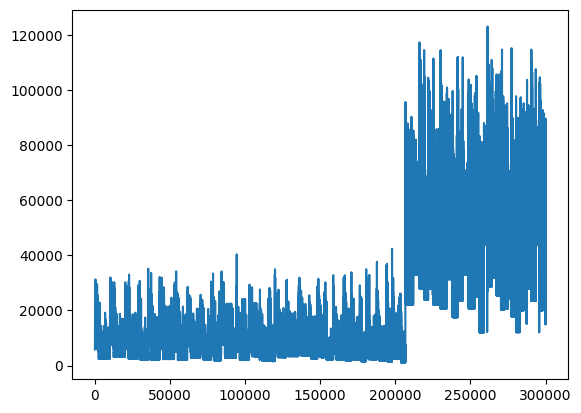

In [10]:
df['price'].plot()

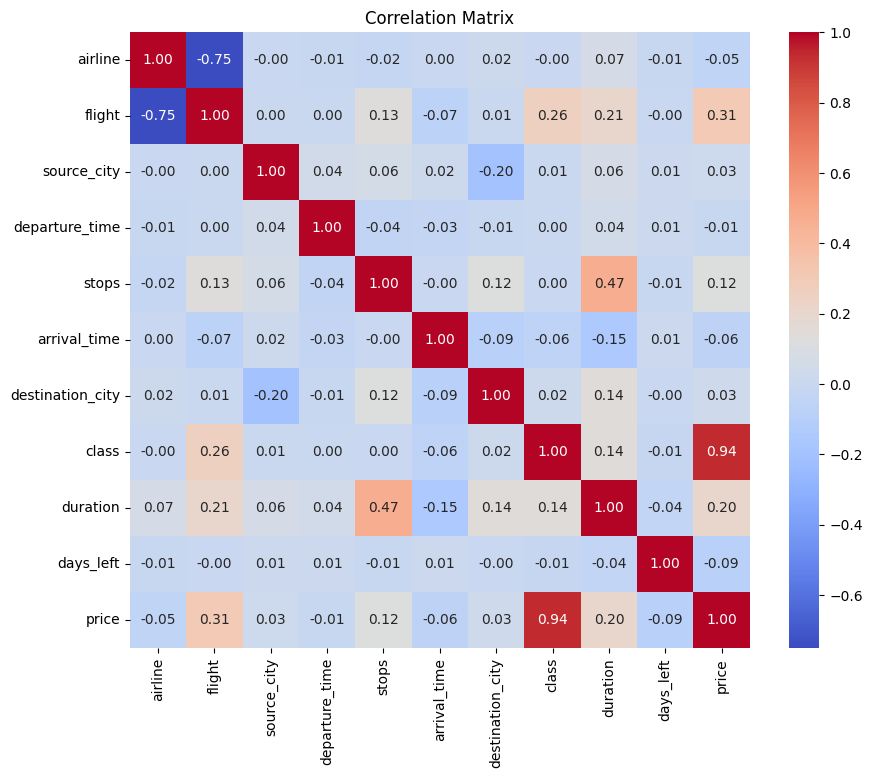

In [11]:
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

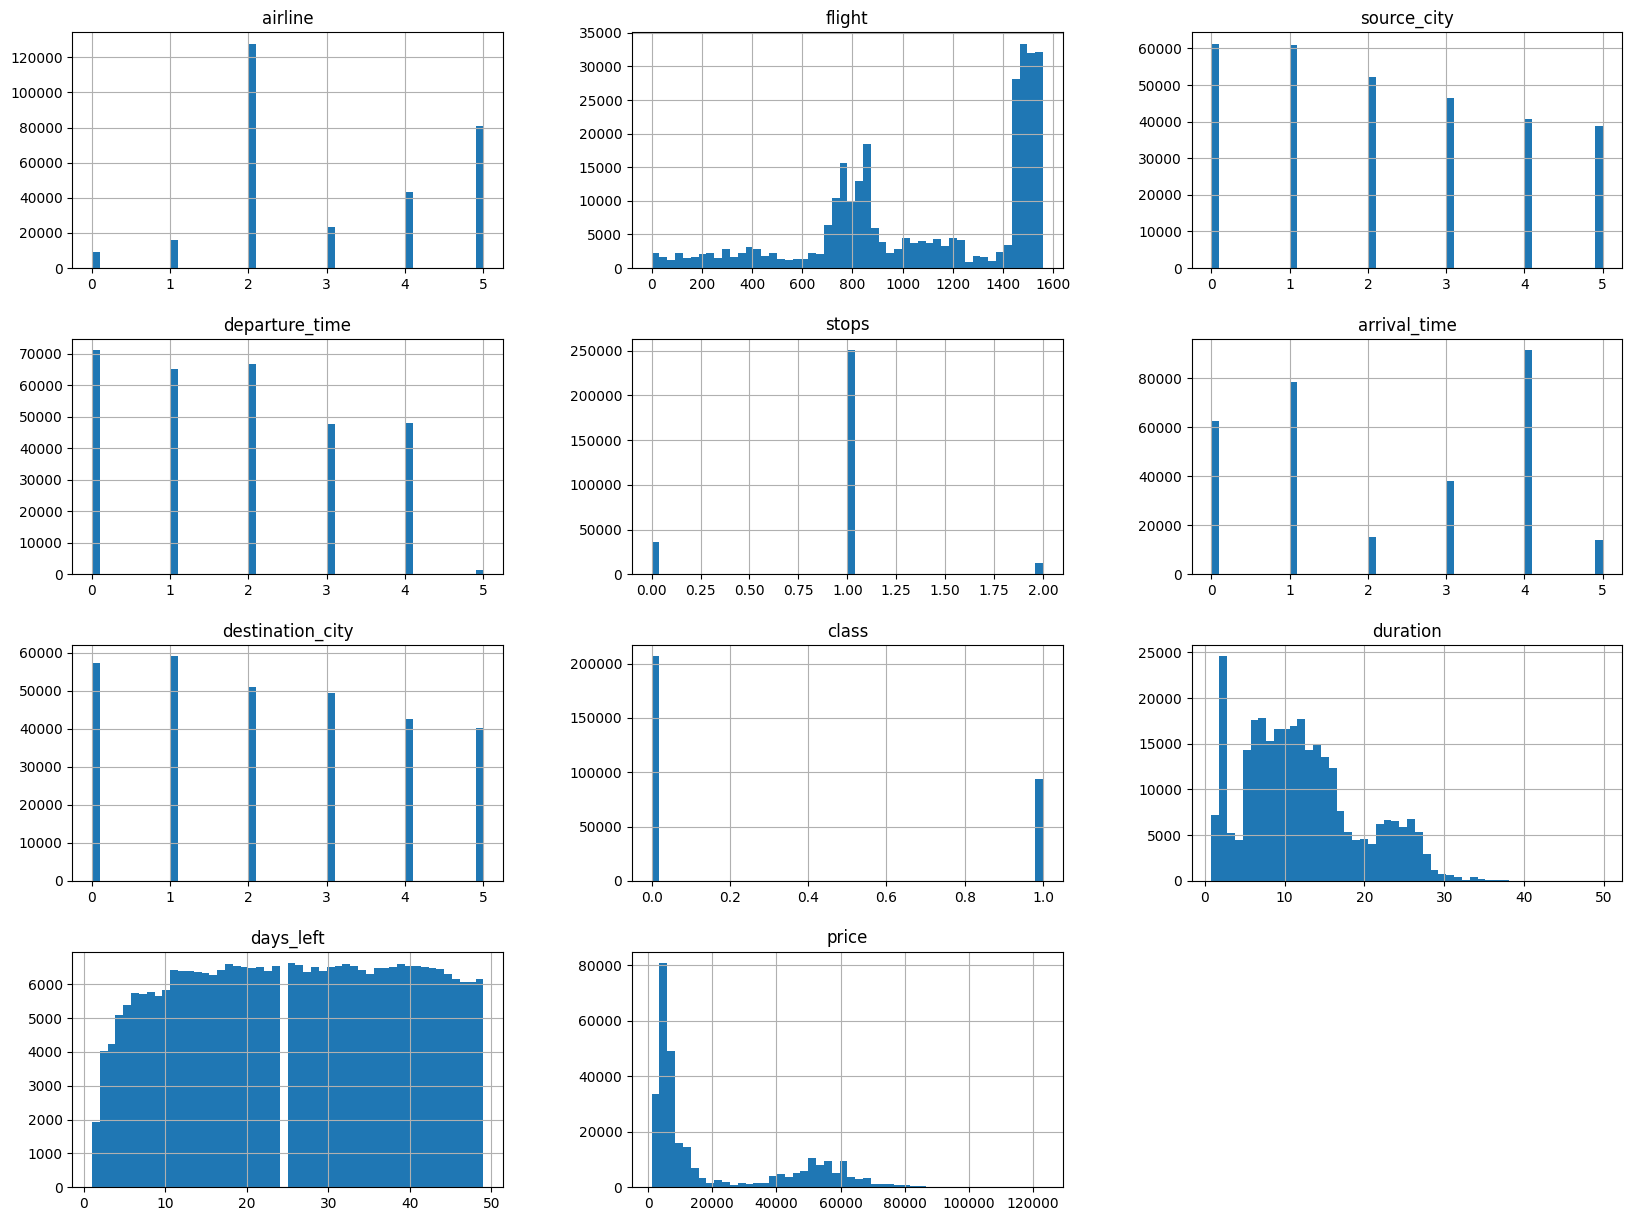

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [39]:
train_set, test_set = train_test_split(df, test_size=0.001, random_state=42)
print("train",len(train_set))
print("test",len(test_set))

train 299852
test 301


In [40]:
train_set.reset_index(drop=True, inplace= True)
train_set

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,689,0,1,1,5,5,0,4.92,46,3389
1,5,745,2,1,1,0,4,0,18.08,45,6200
2,5,907,4,1,2,0,1,0,14.92,11,10967
3,5,798,0,3,1,1,1,0,3.50,19,2476
4,5,764,4,3,1,3,1,1,23.67,26,29954
...,...,...,...,...,...,...,...,...,...,...,...
299847,2,1458,3,1,1,3,0,0,20.50,2,22869
299848,2,1513,2,4,1,4,5,1,25.42,7,44280
299849,5,846,3,4,1,0,1,0,13.67,29,5102
299850,3,924,3,3,1,4,4,0,8.33,39,5574


In [41]:
X_train = train_set.drop(['price'],axis=1)
# X_train.reset_index(drop= True,inplace= True)
X_train


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,689,0,1,1,5,5,0,4.92,46
1,5,745,2,1,1,0,4,0,18.08,45
2,5,907,4,1,2,0,1,0,14.92,11
3,5,798,0,3,1,1,1,0,3.50,19
4,5,764,4,3,1,3,1,1,23.67,26
...,...,...,...,...,...,...,...,...,...,...
299847,2,1458,3,1,1,3,0,0,20.50,2
299848,2,1513,2,4,1,4,5,1,25.42,7
299849,5,846,3,4,1,0,1,0,13.67,29
299850,3,924,3,3,1,4,4,0,8.33,39


In [42]:
y_train = train_set['price']
y_train

0          3389
1          6200
2         10967
3          2476
4         29954
          ...  
299847    22869
299848    44280
299849     5102
299850     5574
299851     6339
Name: price, Length: 299852, dtype: int64

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [44]:
test_set.reset_index(drop= True, inplace= True)
X_test = test_set.drop(['price'],axis= 1)
y_test = test_set['price']

In [45]:
X_test

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,5,748,0,0,1,2,3,0,19.75,40
1,2,1442,3,0,1,4,1,1,9.83,42
2,2,1454,3,0,1,4,2,0,10.50,41
3,2,1479,5,4,1,0,0,1,14.50,14
4,5,743,2,3,1,4,1,0,8.25,20
...,...,...,...,...,...,...,...,...,...,...
296,3,1095,2,3,1,4,0,0,8.50,43
297,1,1167,1,4,1,5,0,0,7.17,38
298,2,1472,0,1,1,4,4,0,4.83,22
299,5,771,4,2,1,3,1,1,6.33,22


In [46]:
price_pred = lin_reg.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
# housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(price_pred, y_test)
lin_mse

np.float64(46410801.879419126)

In [48]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor()

In [49]:
tree_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(2174.7076139058477)

In [50]:
len(y_test)

301

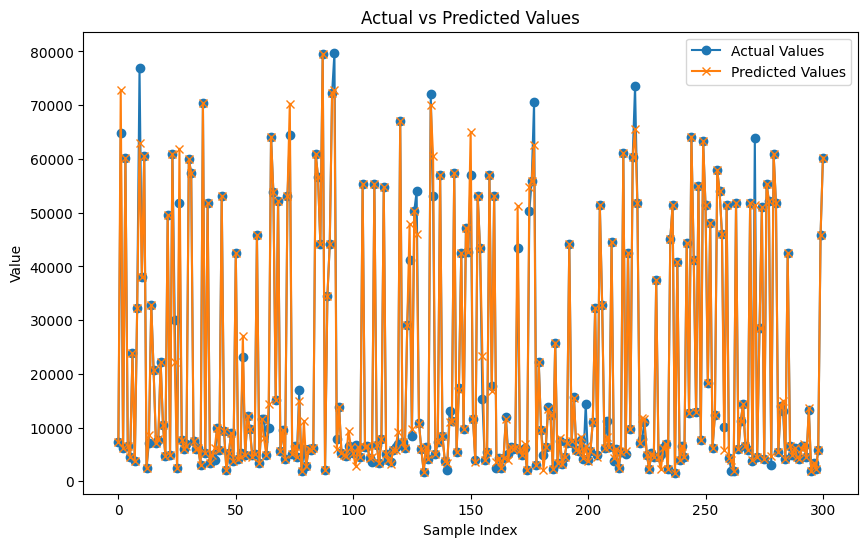

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', marker='o')
plt.plot(tree_pred, label='Predicted Values', marker='x')
# Plotting actual values
# plt.plot(y_test, label='Actual Values', marker='o', linestyle='-', color='b')

# # Plotting predicted values
# plt.plot(tree_pred, label='Predicted Values', marker='x', linestyle='-', color='r')
# plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='b', marker='o')

# # Scatter plot for predicted values
# plt.scatter(range(len(tree_pred)), tree_pred, label='Predicted Values', color='r', marker='x')


plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_test, y_test,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [25]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [3711.97681221 3864.35578215 3647.51949229 3540.95195496 3556.12808909
 3713.15804607 3527.56365226 3626.48269546 3733.6726126  3675.87920218]
Mean: 3659.7688339277656
Standard deviation: 98.36070911860845


In [26]:
lin_scores = cross_val_score(lin_reg,X_test, y_test,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [7183.1957613  7169.37252002 6978.62182563 7010.91086596 6914.90191661
 7057.76996871 7074.11623275 7071.97938623 7015.8679226  7153.5631692 ]
Mean: 7063.02995689994
Standard deviation: 82.57287396214561


In [27]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)


RandomForestRegressor()

In [28]:
forest_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, tree_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(2865.092125263387)

In [29]:
lin_scores = cross_val_score(forest_reg,X_test, y_test,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [2729.69712623 2920.57785724 2843.1266559  2697.0259417  2759.64712249
 2851.44699683 2702.97524411 2792.92085443 2736.96703691 2812.23293829]
Mean: 2784.661777412099
Standard deviation: 68.88710554665288


In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [122]:
grid_search.best_estimator_


RandomForestRegressor(max_features=8, n_estimators=30)

In [123]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3262.9081464785445 {'max_features': 2, 'n_estimators': 3}
2766.135899620418 {'max_features': 2, 'n_estimators': 10}
2633.3030934640033 {'max_features': 2, 'n_estimators': 30}
2866.827836653299 {'max_features': 4, 'n_estimators': 3}
2619.55450288421 {'max_features': 4, 'n_estimators': 10}
2540.214468200826 {'max_features': 4, 'n_estimators': 30}
2781.0058483521225 {'max_features': 6, 'n_estimators': 3}
2539.0479346982142 {'max_features': 6, 'n_estimators': 10}
2477.812958047169 {'max_features': 6, 'n_estimators': 30}
2733.214170861234 {'max_features': 8, 'n_estimators': 3}
2496.0709607273106 {'max_features': 8, 'n_estimators': 10}
2426.5198661784148 {'max_features': 8, 'n_estimators': 30}
3199.3286074334446 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2901.890419185458 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3036.441879640534 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2806.264526958967 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [124]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00573409, 0.04764818, 0.00610677, 0.00247966, 0.00707452,
       0.00276376, 0.01051968, 0.85637271, 0.04310383, 0.01819681])